                                              **Sleep Disorder Prediction Model**

Name : Nilambari Mahajan






PRN  : 202201040118









Name : Rutuja Udanshiv












PRN  : 202201040120

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [ ]:
# Load dataset
file_path = '/content/Sleep_health_and_lifestyle_dataset.csv'
sleep_data = pd.read_csv(file_path)

In [ ]:
# Phase 1: Statistical Summary and Data Exploration
print("Dataset Shape:", sleep_data.shape)
print("\nSummary Statistics:\n", sleep_data.describe())
print("\nNull Values:\n", sleep_data.isnull().sum())
print("\nDataset Head:\n", sleep_data.head())




Dataset Shape: (374, 13)

Summary Statistics:
         Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000 

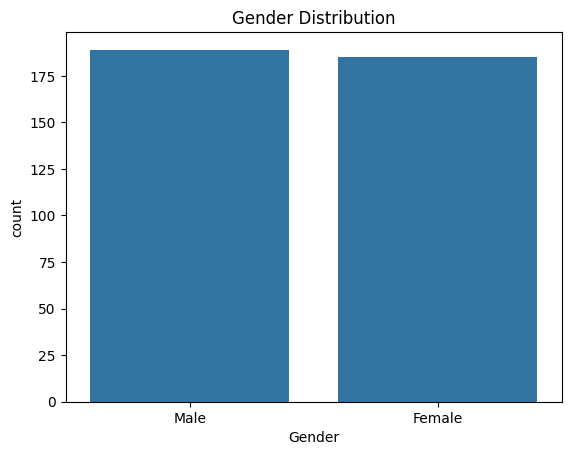

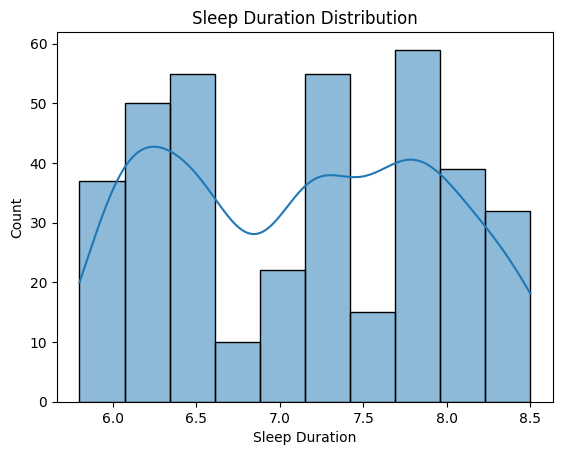

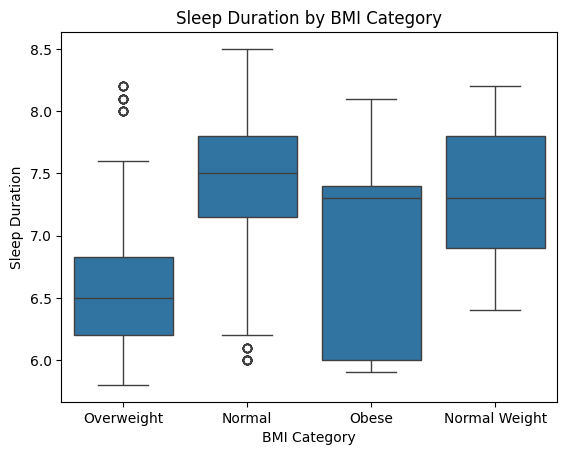

In [ ]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='Gender', data=sleep_data)
plt.title('Gender Distribution')
plt.show()

sns.histplot(sleep_data['Sleep Duration'], kde=True, bins=10)
plt.title('Sleep Duration Distribution')
plt.show()

sns.boxplot(x='BMI Category', y='Sleep Duration', data=sleep_data)
plt.title('Sleep Duration by BMI Category')
plt.show()

In [ ]:
# Phase 2: Data Preparation
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_columns:
    sleep_data[col] = encoder.fit_transform(sleep_data[col])

scaler = StandardScaler()
numerical_columns = ['Age', 'Sleep Duration', 'Quality of Sleep',
                     'Physical Activity Level', 'Stress Level',
                     'Heart Rate', 'Daily Steps']
sleep_data[numerical_columns] = scaler.fit_transform(sleep_data[numerical_columns])


In [ ]:
# Phase 3: Data Splitting
X = sleep_data.drop(['Person ID', 'Blood Pressure', 'Sleep Disorder'], axis=1)
y = sleep_data['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Phase 4: Implementation - Training Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"\n{name}:\n")
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Logistic Regression:

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.74      0.83      0.78        24
           2       0.95      0.91      0.93        66

    accuracy                           0.88       113
   macro avg       0.84      0.86      0.85       113
weighted avg       0.88      0.88      0.88       113

Confusion Matrix:
 [[19  3  1]
 [ 2 20  2]
 [ 2  4 60]]

Decision Tree:

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.84      0.88      0.86        24
           2       0.98      0.92      0.95        66

    accuracy                           0.91       113
   macro avg       0.88      0.90      0.89       113
weighted avg       0.92      0.91      0.91       113

Confusion Matrix:
 [[21  2  0]
 [ 2 21  1]
 [ 3  2 61]]

Random Forest:

Classification Report

In [ ]:
# Phase 5: Optimization and Cross-Validation
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]}")

cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"\nCross-validation scores for {best_model_name}: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Best Model: Random Forest with accuracy: 0.9203539823008849

Cross-validation scores for Random Forest: [0.65333333 0.66666667 0.96       0.50666667 0.83783784]
Mean CV Score: 0.7249009009009009


In [ ]:
# Phase 6: Save the Best Model
joblib.dump(best_model, '/content/best_sleep_model.pkl')
print("Best model saved as best_sleep_model.pkl")


Best model saved as best_sleep_model.pkl


In [ ]:
# Importing necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Evaluate the performance of each model
evaluation_metrics = {}

for name, model in models.items():
    # Predictions
    predictions = model.predict(X_test)

    # Metrics Calculation
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)

    # Storing metrics for each model
    evaluation_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print Evaluation Results
    print(f"\n{name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

# Displaying the summary of all models
print("\nSummary of Model Performance:")
summary_df = pd.DataFrame(evaluation_metrics).T
print(summary_df)

# Highlight the best model based on F1 Score
best_model_name = summary_df['F1 Score'].idxmax()
print(f"\nBest Model based on F1 Score: {best_model_name}")



Logistic Regression Evaluation Metrics:
Accuracy: 0.8761
Precision: 0.8817
Recall: 0.8761
F1 Score: 0.8780
Confusion Matrix:
[[19  3  1]
 [ 2 20  2]
 [ 2  4 60]]


Decision Tree Evaluation Metrics:
Accuracy: 0.9115
Precision: 0.9175
Recall: 0.9115
F1 Score: 0.9132
Confusion Matrix:
[[21  2  0]
 [ 2 21  1]
 [ 3  2 61]]


Random Forest Evaluation Metrics:
Accuracy: 0.9204
Precision: 0.9242
Recall: 0.9204
F1 Score: 0.9216
Confusion Matrix:
[[21  2  0]
 [ 2 21  1]
 [ 2  2 62]]


Gradient Boosting Evaluation Metrics:
Accuracy: 0.9115
Precision: 0.9160
Recall: 0.9115
F1 Score: 0.9131
Confusion Matrix:
[[20  3  0]
 [ 2 21  1]
 [ 2  2 62]]


Summary of Model Performance:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.876106   0.881725  0.876106  0.878043
Decision Tree        0.911504   0.917455  0.911504  0.913203
Random Forest        0.920354   0.924180  0.920354  0.921578
Gradient Boosting    0.911504   0.915962  0.911504  0.913065

Best Model based on F

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split dataset for regression task
X = sleep_data.drop(['Person ID', 'Blood Pressure', 'Sleep Duration'], axis=1)  # Example: predict 'Sleep Duration'
y = sleep_data['Sleep Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
regression_models = {
    "Decision Tree (Regression)": DecisionTreeRegressor(random_state=42),
    "KNN (Regression)": KNeighborsRegressor()
}

# Evaluate models
regression_results = {}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    regression_results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R² Score": r2
    }

    # Print results
    print(f"\n{name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

# Summary of regression results
print("\nRegression Model Comparison:")
regression_summary = pd.DataFrame(regression_results).T
print(regression_summary)

# Identify the best model
best_reg_model = regression_summary['R² Score'].idxmax()
print(f"\nBest Regression Model: {best_reg_model}")



Decision Tree (Regression) Metrics:
MSE: 0.0116
RMSE: 0.1077
MAE: 0.0692
R² Score: 0.9893

KNN (Regression) Metrics:
MSE: 0.0200
RMSE: 0.1415
MAE: 0.0942
R² Score: 0.9816

Regression Model Comparison:
                                 MSE      RMSE       MAE  R² Score
Decision Tree (Regression)  0.011589  0.107654  0.069193  0.989344
KNN (Regression)            0.020010  0.141455  0.094221  0.981602

Best Regression Model: Decision Tree (Regression)
